# Introduction

This script will walk you through the process of fitting a linear model using polynomial basis functions, and the selection of a hyper-parameter using a validation data set.

# Data Generation

The following section of the code generates the training and testing sets using the simple model
$$ y = f(x) + \epsilon = 5x(x-0.5)(x-1) + \epsilon$$
where $\epsilon \sim N(0,0.2)$ is a Gaussian noise term with zero mean and standard deviation equal to 0.2.

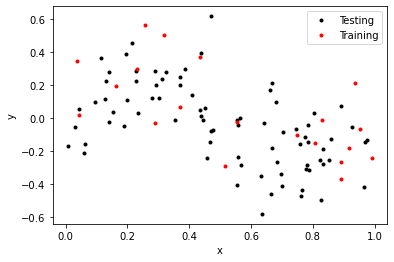

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Defining data generation model
def f(x):
    return 5*(x-0)*(x-0.5)*(x-1)

# Defining std of noise
stdNoise = 0.2;

# Setting a seed for random number generator
rng = np.random.default_rng(seed=42)

# Generating training, validation and test data
N = 80
x_train = rng.random(N)
y_train = f(x_train)+stdNoise*rng.normal(size=N)

N = 20
x_test = rng.random(N)
y_test = f(x_test)+stdNoise*rng.normal(size=N)

# Plotting data purely for verification
plt.plot(x_train,y_train,'k.',x_test,y_test,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend({'Training','Testing'})
plt.show()

# Functions for Fitting a Polynomial to the Data

The functions below provide an implementation of a linear fitting of monomials to the data.

In [5]:
# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit(x,y,deg):
    return np.linalg.lstsq(create_X(x,deg),y,rcond=None)[0]

# Function for computing the MSE
def rmse(y,yPred):
    se = (y-yPred)**2
    return np.sqrt(np.mean(se))


# Hyper-Parameter Selection using Polynomial Fitting

This section illustrates how to perform hyper-parameter selection where the capacity of the model is captured by the degree of the polynomial used for fitting.

First, we fit the data to the entire training set and compute the corresponding training and test errors. We used all of the data since we are not performing any hyper-parameter selection at this point.

Training Error = 0.205
Test Error = 0.241


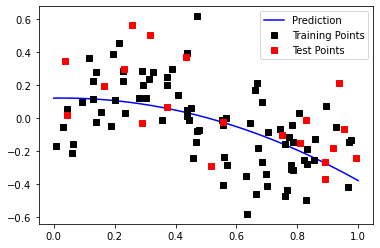

In [6]:
# Fitting model
deg = 2
beta = fit(x_train,y_train,deg)

# Computing training error
y_train_pred = predict(x_train,beta)
err = rmse(y_train,y_train_pred)
print('Training Error = {:2.3}'.format(err))

# Computing test error
y_test_pred = predict(x_test,beta)
err = rmse(y_test,y_test_pred)
print('Test Error = {:2.3}'.format(err))

# Plotting fitted model
x = np.linspace(0,1,100)
y = predict(x,beta)
plt.plot(x,y,'b-',x_train,y_train,'ks',x_test,y_test,'rs')
plt.legend(['Prediction','Training Points','Test Points'])
plt.show()

## Data Preparation

Spliting the data into pre-val training and validation. Using last 30 samples for validation and the rest of the pre-validation training set. Keeping all measurements in the same order as the original training set. Making sure the variables specified below are used for this purpose.

In [7]:
x_preval, y_preval = [], []
x_val, y_val = [],[]

x_preval, y_preval = x_train[:len(x_train)-30], y_train[:len(x_train)-30]
x_val, y_val = x_train[len(x_train)-30:], y_train[len(x_train)-30:]


In [8]:
"""Check that the dimensions are correct and the correct data is included in each variable"""
assert len(x_val)==30
assert len(y_val)==30
assert len(x_preval)==len(x_train)-30
assert len(y_preval)==len(y_train)-30
assert x_val[-1]==x_train[-1]
assert y_val[-1]==y_train[-1]
assert x_preval[0]==x_train[0]
assert y_preval[0]==y_train[0]

## Using the Model defined above
Next, computing training and validation errors for each of the listed degrees. The training error should show a decreasing pattern. The validation error should decrease and then increase.

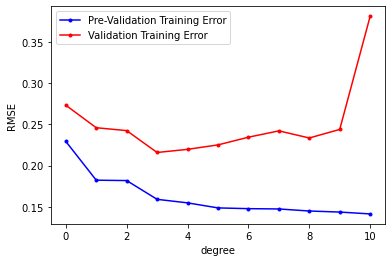

In [9]:
# List of degrees considered for the analysis
degList =  [0,1,2,3,4,5,6,7,8,9,10]

# Initializing range of degree values to be tested and errors
errTrain = np.zeros(len(degList))
errVal = np.zeros(len(degList))

# Computing training and validation RMSE errors for each degree value

# YOUR CODE HERE
for x in degList:
  beta = fit(x_preval,y_preval,x)

  y_train_pred = predict(x_preval,beta)
  errTrain[x]=(rmse(y_preval,y_train_pred))

  y_test_pred = predict(x_val,beta)
  errVal[x] = rmse(y_val,y_test_pred)
  

# Plotting results
plt.plot(degList,errTrain,'b.-',degList,errVal,'r.-')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend(['Pre-Validation Training Error','Validation Training Error'])
plt.show()

In [ ]:
"""Check that the correct trends and the correct values are present"""
assert -np.max(np.diff(errTrain))>0 ### Checking for monotonicity of training error
assert -np.min(np.diff(errVal))>0 ### Checking for some decreasing trend in the validation error
assert np.max(np.diff(errVal))>0 ### Checking for some increasing tred in the validation error
assert np.abs(min(errTrain)-0.14)<1e-2 ### Checking the minimum of the training error
assert np.abs(min(errVal)-0.22)<1e-2 ### Checking the minimum of the testing error


## Performance of Optimal Model
We are demonstrating the performance of the model by comparing the error when training with only the pre-validation training data, and with the training and validation data after the hyper-parameter has already been selected.



Optimal Degree = 3
Test Error [Preval Dataset Only] = 0.216
Test Error [Full Training Dataset] = 0.214


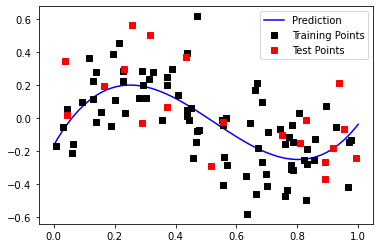

In [12]:
# Selecting optimal degree
degOpt = degList[np.argmin(errVal)]
print('Optimal Degree = {:1}'.format(degOpt))

# Initializing variable for the error using only the pre-validation training set
errTest_PreVal = []

# Initializing variable for the error using only the full training set
errTest_FullTrain = []

# YOUR CODE HERE
# Computing pre-validation training error
beta_val = fit(x_preval,y_preval,degOpt)
y_val_pred = predict(x_test,beta_val)
errTest_PreVal = rmse(y_test,y_val_pred)

# Computing Full training Error
beta_train = fit(x_train,y_train,degOpt)
y_train_pred = predict(x_test,beta_train)
errTest_FullTrain = rmse(y_test,y_train_pred)

# Printing results
print('Test Error [Preval Dataset Only] = {:2.3}'.format(errTest_PreVal))
print('Test Error [Full Training Dataset] = {:2.3}'.format(errTest_FullTrain))

# Plotting fitted model
x = np.linspace(0,1,100)
y = predict(x,beta_train) # Use the beta from the full training set for better visualization
plt.plot(x,y,'b-',x_train,y_train,'ks',x_test,y_test,'rs')
plt.legend(['Prediction','Training Points','Test Points'])
plt.show()

In [ ]:
"""Check that the correct values are present"""
assert errTest_PreVal>errTest_FullTrain # The full-training set error should be lower
